<h1><span style="color:blue">Busca y descarga el conjunto de datos “Climate Model Simulation Crashes” del repositorio UCI Machine Learning. Tiene los datos de un problema de clasificación.</span></h1>

Este es un data set que me dice bajo que situaciones se rompe un sistema de climatizacion.


<h1><span style="color:blue">Cárgalo adecuadamente en un Pandas DataFrame</span></h1>

In [1]:
from pandas import read_csv 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import random
import pandas

df = pandas.read_excel('climate_dataset.xlsx')

#MIssing values
df.fillna(0,inplace=True)

In [2]:
df.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


In [3]:
df.shape

(540, 21)

In [4]:
df.dtypes

Study                     int64
Run                       int64
vconst_corr             float64
vconst_2                float64
vconst_3                float64
vconst_4                float64
vconst_5                float64
vconst_6                float64
vconst_7                float64
ah_corr                 float64
ah_bolus                float64
slm_corr                float64
efficiency_factor       float64
tidal_mix_max           float64
vertical_decay_scale    float64
convect_corr            float64
bckgrnd_vdc1            float64
bckgrnd_vdc_ban         float64
bckgrnd_vdc_eq          float64
bckgrnd_vdc_psim        float64
outcome                   int64
dtype: object

In [5]:
df.describe()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.000000,90.500000,0.500026,0.500097,0.500027,0.500119,0.500001,0.499913,0.500059,0.500076,...,0.500111,0.499984,0.500032,0.499933,0.499944,0.499946,0.500044,0.500020,0.500021,0.914815
std,0.817254,52.008901,0.288939,0.288922,0.289067,0.288993,0.288827,0.288852,0.289010,0.288909,...,0.288966,0.289127,0.289014,0.288822,0.288949,0.288923,0.288813,0.288936,0.289013,0.279416
min,1.000000,1.000000,0.000414,0.001922,0.001181,0.001972,0.000858,0.000476,0.004590,0.000296,...,0.002015,0.000419,0.001188,0.001312,0.002509,0.000732,0.000891,0.000219,0.000263,0.000000
25%,1.000000,45.750000,0.249650,0.251597,0.251540,0.250158,0.250630,0.251325,0.253048,0.250402,...,0.250758,0.251676,0.249669,0.249988,0.249586,0.249974,0.250412,0.252739,0.249723,1.000000
50%,2.000000,90.500000,0.499998,0.499595,0.500104,0.500456,0.500903,0.499174,0.499070,0.500074,...,0.500393,0.500322,0.500151,0.500625,0.499080,0.499959,0.500384,0.498955,0.499431,1.000000
75%,3.000000,135.250000,0.750042,0.750011,0.749180,0.750348,0.748988,0.748166,0.750109,0.749091,...,0.749447,0.749346,0.749164,0.749569,0.750012,0.747978,0.749256,0.748539,0.749792,1.000000
max,3.000000,180.000000,0.999194,0.998815,0.998263,0.997673,0.998944,0.997142,0.998930,0.998506,...,0.999536,0.999942,0.997718,0.997518,0.999795,0.999155,0.997265,0.999306,0.999655,1.000000




<h1><span style="color:blue">Realiza un conteo de las clases y analiza si hay desequilibrio.</span></h1>


Lo primero que hago es identificar si existe un desequilibrio.
Utilizo la clase **groupby** para ver cuantos datos hay de cada clase.

In [6]:
class_distribution = df.groupby('outcome').size()
print(class_distribution)

outcome
0     46
1    494
dtype: int64


Este es un caso de clasificación binaria en donde existe un claro desquilibrio entre clases.

Por lo tanto el **ACCURACY** no será la mejor métrica para calcular el rendimiento del modelo predictivo.

Tendré que utilizar otras metricas para lograr compesar ese desequilibrio de clases.

<span style="color:blue">**Correlacion entre los atributos**</span>.

Mucha correlación (cambio al mismo tiempo de una variable con respecto a otra) conlleva a que muchos modelos ML funcionen mal.

Si existe mucha correlación lo suyo es eliminar uno de los dos o hacer una combinacion (Lineal o no linea) 

Se puede ver la correlación fuerte entre atributos(Cercanos al 0):
   - vconst_2/vconst_corr
   - vconst_6/ vconst_corr
   - vertical_decay_scale/ vconst_2

In [7]:
df.corr()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
Study,1.000000e+00,1.034649e-15,-0.000397,0.000307,-0.000521,0.000242,-0.000086,-0.000431,0.000254,0.000051,...,0.000391,-0.000052,-0.000105,-0.000225,0.000544,-0.000124,-9.020752e-07,-0.000280,0.000180,0.048748
Run,1.034649e-15,1.000000e+00,-0.034414,-0.058644,-0.018387,-0.021134,-0.042972,-0.040134,-0.039149,-0.094475,...,0.080217,-0.003172,-0.048443,-0.068251,-0.047611,0.045694,-1.059208e-01,-0.014953,0.039661,-0.013916
vconst_corr,-3.970866e-04,-3.441408e-02,1.000000,0.004039,0.009331,-0.018294,0.018880,0.001544,0.003714,-0.012735,...,0.010617,-0.014205,-0.008992,-0.002980,-0.002133,-0.002099,1.597279e-02,-0.016631,-0.001467,-0.304787
vconst_2,3.067568e-04,-5.864436e-02,0.004039,1.000000,-0.000456,-0.000614,-0.008292,-0.024379,-0.005182,0.004179,...,-0.011072,0.019706,0.001623,0.002608,-0.014716,0.004386,5.998563e-03,0.004202,0.009141,-0.302388
vconst_3,-5.213985e-04,-1.838657e-02,0.009331,-0.000456,1.000000,0.009899,0.006289,-0.001587,0.019941,0.004402,...,0.007100,-0.009428,-0.024702,-0.020637,-0.004264,-0.005210,-5.588027e-04,0.004771,-0.001334,0.000227
vconst_4,2.424574e-04,-2.113392e-02,-0.018294,-0.000614,0.009899,1.000000,0.020504,0.021931,0.001805,-0.002334,...,-0.004753,0.018320,-0.010004,-0.006762,0.020442,-0.001080,-9.261710e-03,-0.017147,0.005053,0.072297
vconst_5,-8.609083e-05,-4.297164e-02,0.018880,-0.008292,0.006289,0.020504,1.000000,0.005887,-0.003047,0.012453,...,0.001077,0.021354,-0.016312,0.021380,0.009894,-0.019179,-2.075219e-02,-0.009324,0.012265,0.054390
vconst_6,-4.308863e-04,-4.013435e-02,0.001544,-0.024379,-0.001587,0.021931,0.005887,1.000000,-0.016770,-0.021644,...,0.015121,0.000075,0.015288,0.007036,-0.003641,-0.007897,-6.575539e-03,0.013203,0.008412,0.048646
vconst_7,2.542364e-04,-3.914892e-02,0.003714,-0.005182,0.019941,0.001805,-0.003047,-0.016770,1.000000,-0.035498,...,0.009604,-0.006832,0.016503,0.002921,0.012447,-0.003368,7.050740e-03,0.002443,-0.002381,0.017049
ah_corr,5.095786e-05,-9.447464e-02,-0.012735,0.004179,0.004402,-0.002334,0.012453,-0.021644,-0.035498,1.000000,...,0.012260,0.012005,-0.003947,-0.019307,-0.010642,0.004866,3.239789e-02,0.000259,0.007055,0.003895


<span style="color:blue">**SESGO** </span>.

Utilizamos la funcion de pandas . **Skew**

Este metodo nos presenta el sesgo de cada una de las variables

In [8]:
df.skew()

Study                   0.000000e+00
Run                     0.000000e+00
vconst_corr            -4.816699e-04
vconst_2               -6.619501e-04
vconst_3                1.581241e-04
vconst_4               -2.429515e-04
vconst_5                1.967060e-04
vconst_6               -3.295380e-04
vconst_7               -8.327432e-04
ah_corr                 8.536877e-04
ah_bolus                2.336961e-04
slm_corr                1.220987e-03
efficiency_factor      -3.969568e-04
tidal_mix_max          -7.382739e-04
vertical_decay_scale   -7.203782e-04
convect_corr            1.274561e-03
bckgrnd_vdc1            1.239848e-03
bckgrnd_vdc_ban        -5.549689e-04
bckgrnd_vdc_eq         -1.188536e-04
bckgrnd_vdc_psim       -8.802726e-07
outcome                -2.980195e+00
dtype: float64

Podemos ver variables con valores muy por encima de 0  ----> **ah_corr**.  Este valor se mostrara muy a la DERECHA

Pero también existen muchas más variables muy por debajo de 0 (IZQUIERDA):
-  bckgrnd_vdc_psim
- vconst_7
- vconst_2
- bckgrnd_vdc_ban

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

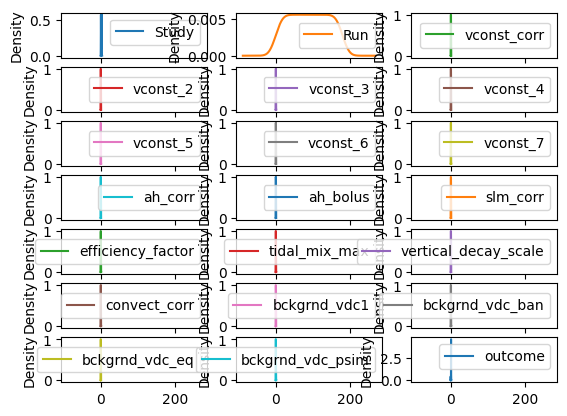

In [9]:
# Cada una de las varaiables que conforman el DATA SET
df.plot(kind='density', subplots=True, layout=(7,3))


<h1><span style="color:blue"> Evalua el rendimiento del modelo k-Nearest Neigbours mediante las tres estrategias de validación cruzada estudiados y utilizando la métrica que consideres más adecuada.</span></h1>

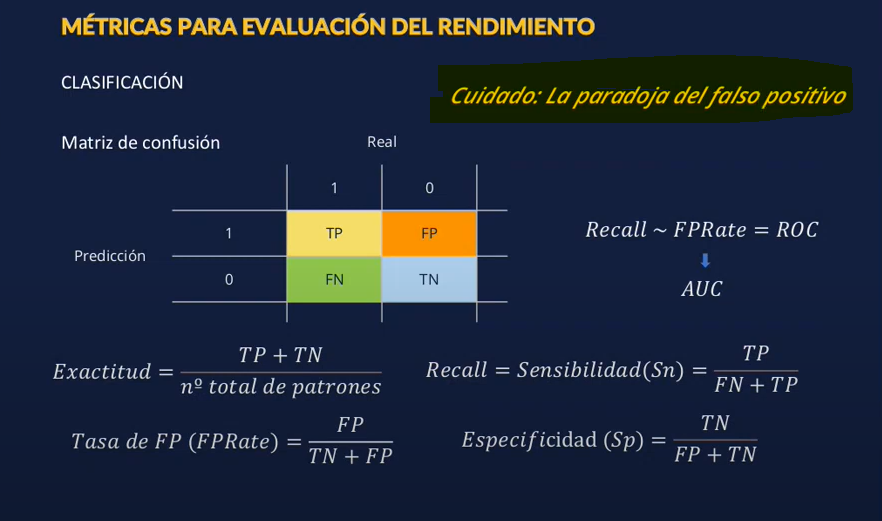

In [10]:
from IPython.display import Image
Image(filename='5.PNG') 

Cuando hay un gran desequilibrio de clases el **ACCURACY** no es la mejor métrica. Es necesario tomar en cuenta otras métricas como la snesibilidad y la especificidad.

Es como cunado un médico siempre diagnostica sus pacientes como sanos. El rendimiento del modelo dirá que el médico es bueno, pero en relacidad es muy malo.

El ++accuracy++ no nos ayudará a detectar que el médico es malo . Pero si utilizamos otras metricás saldrá a la luz que los números están mal, especialmente cunado se combinan **especificidad** y **sensibilidad**

- AUC
- Balanced Accuracy
- SN/SP

La mayoría de las situaciones de la vida real tienen desequilibrio.

**Particionado de datos (train-test) con Scaler**

In [11]:
import pandas

data = pandas.read_excel('climate_dataset.xlsx')

#MIssing values
data.fillna(0,inplace=True)


data.head()

,Study,Run,vconst_corr,vconst_2,vconst_3,vconst_4,vconst_5,vconst_6,vconst_7,ah_corr,...,slm_corr,efficiency_factor,tidal_mix_max,vertical_decay_scale,convect_corr,bckgrnd_vdc1,bckgrnd_vdc_ban,bckgrnd_vdc_eq,bckgrnd_vdc_psim,outcome
0,1,1,0.859036,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,0
1,1,2,0.606041,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,1
2,1,3,0.997600,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,1
3,1,4,0.783408,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,1
4,1,5,0.406250,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,1


#### Primero

Divido los datos entre los inputs y el output

In [12]:
X = data[data.columns[:-1]]
Y = data['outcome']

#### Segundo

Divido con la funcion **train_test_split**

Le paso todo el conjunto de datos

Ento me divide en 70% para entrenamiento y 30% para test

Vamos a continuar utilizando <span style="color:red"> **X_train** y **y_train** </span> en los modelos de validación

In [1]:
test_portion = 0.3

seed = random.randint(0,10)

# Aqui genero 4 dataframes nuevos (2 train, 2 test) 
#Usamos el 30% de instancias para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_portion, random_state=seed)

NameError: name 'random' is not defined



<h3><span style="color:red">**K-FOLD** </span> </h3>

In [14]:
## Son los mismos imports de arriba más éste
from sklearn.model_selection import KFold

from pandas import read_csv 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import random


In [15]:
# Definimos el número de particiones
k = 10
seed = random.randint(0,10)

Instancia un nuevo objeto de la clase KFold
**n_plit** indico el numero de particiones
**shuffle** es un proceso completamente aleatorio

In [16]:
kfold = KFold(n_splits=k, random_state=seed, shuffle= True)

Una vez que tenga esto genero el modelo predictivo **KNN**

In [17]:
model = KNeighborsClassifier()

Ahora aqui es lo importante donde utilizo la funcion **cross_var_score**

Lo que hace es, atraves del parametro **cv** (pasamos el objeto generado de tipo KFOLD)

En este caso va a particionarlo aleatoriamente en 10 partes 

Nos arroja un resultado de cada un ade las interacciones que haayamos generado.

<span style="color:red"> **Scoring** </span> recibe una cadena de texto de la metrica que quiero utilizar.

Así de simple decido cual métrica utilizar.

In [30]:
from sklearn.model_selection import cross_val_score

## Alimento con los modelos de train que obtuve con Scaler.
##res = cross_val_score(model,X_train,y_train,cv=kfold, scoring='roc_auc')
##res = cross_val_score(model,X_train,y_train,cv=kfold, scoring='balanced_Acc')
##res = cross_val_score(model,X_train,y_train,cv=kfold, scoring='')
res = cross_val_score(model,X_train,y_train,cv=kfold, scoring= 'balanced_accuracy')

## Aqui muestro la MEDIA y la DESVIACION STD para registrar el rendimiento de estemodelo
print("Acc: %.3f+/.%.3f"% (res.mean(),res.std()))

Acc: 0.550+/.0.150



<h3><span style="color:red">**Leave-one-out** </span> </h3>

#### Inconveniente:

GEnerar tantos modelos no es fácil y toma muchisimos recurso computacionales.

Pero cuando se pueda esta es la tecnica que más se parece la vida real.

In [19]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [36]:
loocv = LeaveOneOut()
model = KNeighborsClassifier()

# Igual que antes lo unico es introducir el objeto loovp dentro del parametro CV (Cross validation)
results = cross_val_score(model, X_train,y_train, cv=loocv,scoring='balanced_accuracy')

## Aqui muestro la MEDIA y la DESVIACION STD para registrar el rendimiento de estemodelo
print("Acc: %.3f+/.%.3f"% (results.mean(),results.std()))

C:\Users\Mauro.CespedesAraya\github\PythonSamples\py_machine_learning\env\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\github\PythonSamples\py_machine_learning\env\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\github\PythonSamples\py_machine_learning\env\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\github\PythonSamples\py_machine_learning\env\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\github\

Acc: 0.907+/.0.290


C:\Users\Mauro.CespedesAraya\github\PythonSamples\py_machine_learning\env\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")



<h3><span style="color:red">**Monte-Carlo** </span> </h3>

In [21]:
from sklearn import model_selection

In [22]:
# Definimos el número de particiones
k = 100
seed = random.randint(0,10)
test_portion= 0.1

In [34]:
montecarlo = model_selection.ShuffleSplit(n_splits=k, test_size=test_portion, random_state=seed)

model = KNeighborsClassifier()

# Igual que antes lo unico es introducir el objeto loovp dentro del parametro CV (Cross validation)
res = model_selection.cross_val_score(model,X,Y,cv=montecarlo, scoring= 'balanced_accuracy')

## Aqui muestro la MEDIA y la DESVIACION STD para registrar el rendimiento de estemodelo
print("Acc: %.3f+/.%.3f"% (res.mean(),res.std()))

Acc: 0.503+/.0.050
